In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import sys
sys.path.append('./StrategyTrader')

In [2]:
from StrategyTrader.src.strategy import MovingAverageCrossoverStrategy, StrategyConfig
from StrategyTrader.src.performance_analyzer_impl import PerformanceAnalyzerImpl, PerformanceVisualizerImpl
from StrategyTrader.src.optimizer import StrategyOptimizer

data = pd.read_csv('/Users/remoti/code/Trad-loop/DataExtractor/bitcoin_hourly_2025.csv')
data.head()

ModuleNotFoundError: No module named 'skopt'

In [3]:
config = StrategyConfig(
    symbol='BTC/USD',
    timeframe='5m',
    initial_capital=10000,
    risk_per_trade=2.0,
    max_positions=3,
    commission=0.1,
    slippage=0.05
)

strategy = MovingAverageCrossoverStrategy(
    config=config,
    fast_period=10,
    slow_period=30,
    rsi_period=14
)

In [4]:
strategy.load_data(data)
strategy.backtest()
metrics = strategy.get_performance_metrics()

print(metrics)

{'total_trades': 293, 'winning_trades': 58, 'losing_trades': 235, 'win_rate': 19.795221843003414, 'profit_factor': np.float64(0.27465642610994945), 'total_return_pct': np.float64(-45.77546209376674), 'max_drawdown_pct': np.float64(-47.03157089739414), 'final_capital': np.float64(5422.453790623325), 'avg_win': np.float64(29.88482660511414), 'avg_loss': np.float64(-26.85474958499364), 'sharpe_ratio': np.float64(-0.9868562566562514)}


In [5]:
analyzer = PerformanceAnalyzerImpl(
    equity_curve=strategy.equity_curve,
    trades=pd.DataFrame(strategy.closed_trades),
    initial_capital=config.initial_capital
)

analyzer.print_report()


                    REPORTE DE PERFORMANCE

[RENTABILIDAD]
  Capital Inicial:        $10,000.00
  Capital Final:          $5,422.45
  P&L Total:              $-4,577.55
  Retorno Total:          -45.78%
  CAGR:                   0.00%
  Expectancy:             $-15.62

[RIESGO]
  Max Drawdown:           -47.03%
  Duración Max DD:        3 períodos
  Volatilidad Anual:      0.88%
  VaR 95%:                $-5.15

[EFICIENCIA - Risk-Adjusted]
  Sharpe Ratio:           -3.25 [Malo]
  Sortino Ratio:          -2.49
  Calmar Ratio:           -0.02 [Bajo]
  Omega Ratio:            0.40

[CONSISTENCIA]
  Win Rate:               19.80% [Bajo]
  Profit Factor:          0.27 [Perdedora]
  Risk/Reward:            1.11
  Recovery Factor:        -0.97

[METRICAS OPERATIVAS]
  Total Trades:           293
  Trades Ganadores:       58
  Trades Perdedores:      235
  Duración Prom:          0.0 horas
  Max Racha Ganadora:     3
  Max Racha Perdedora:    25

VEREDICTO: ESTRATEGIA NO VIABLE - Rediseñar c

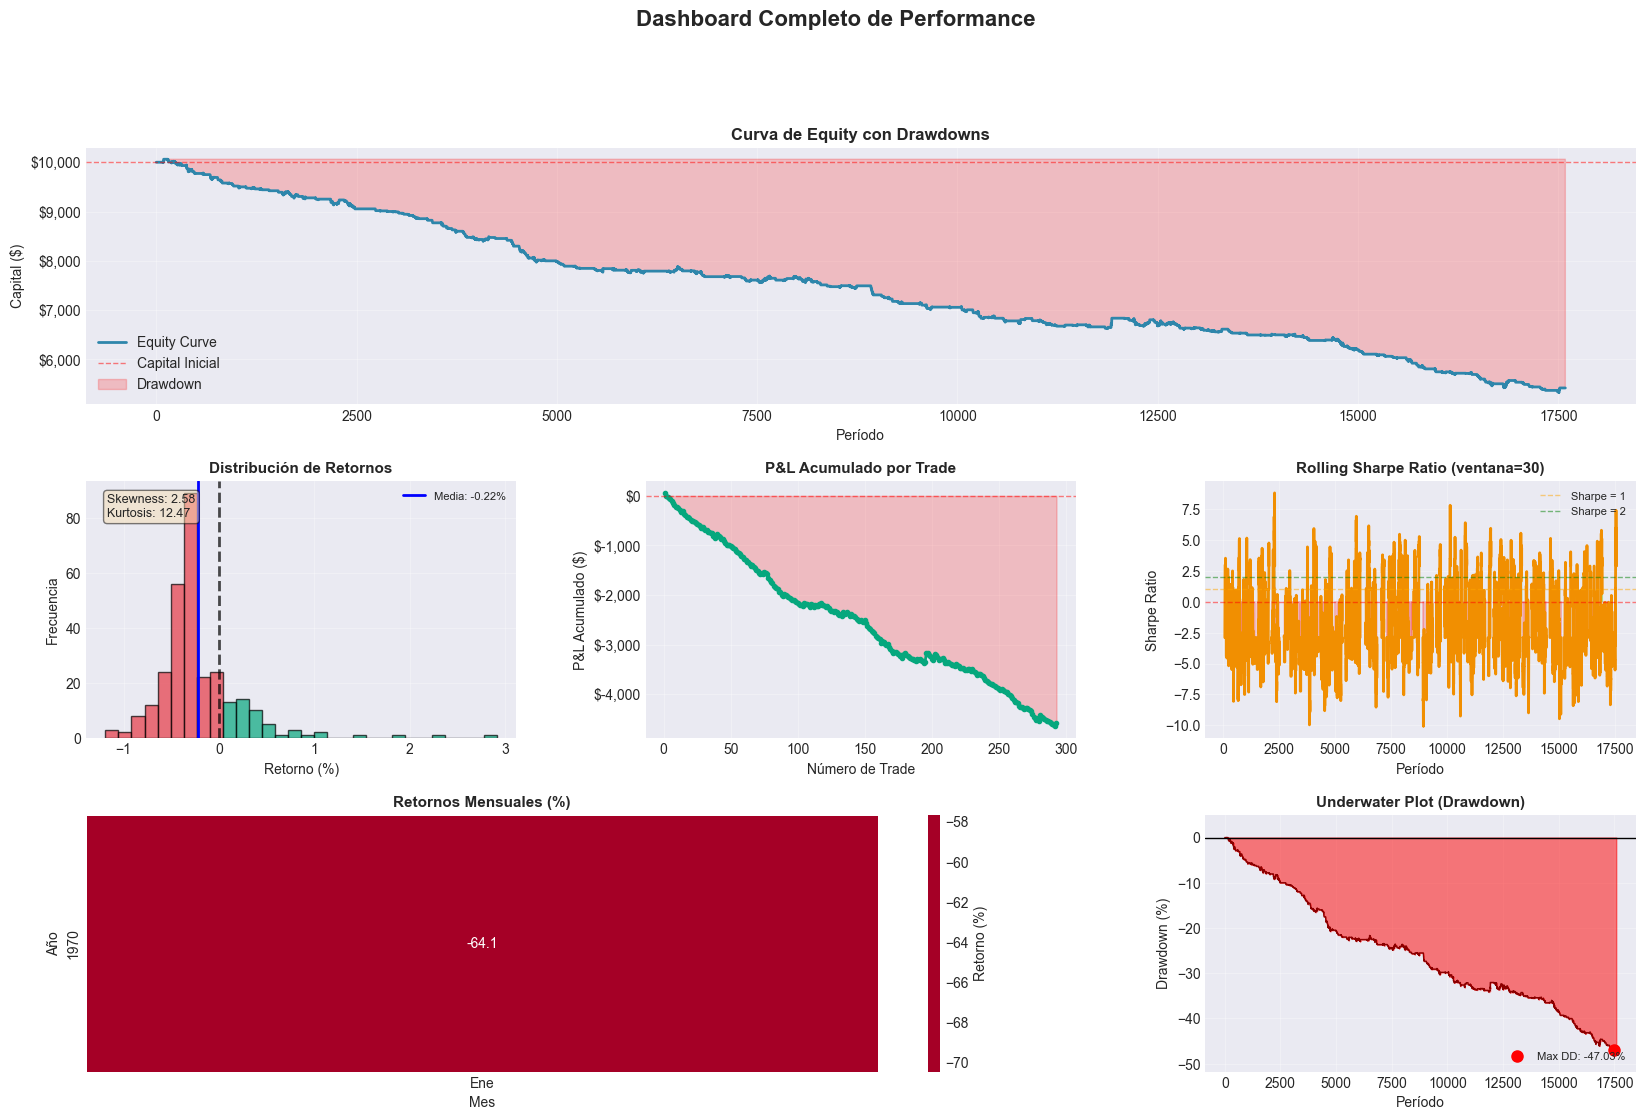

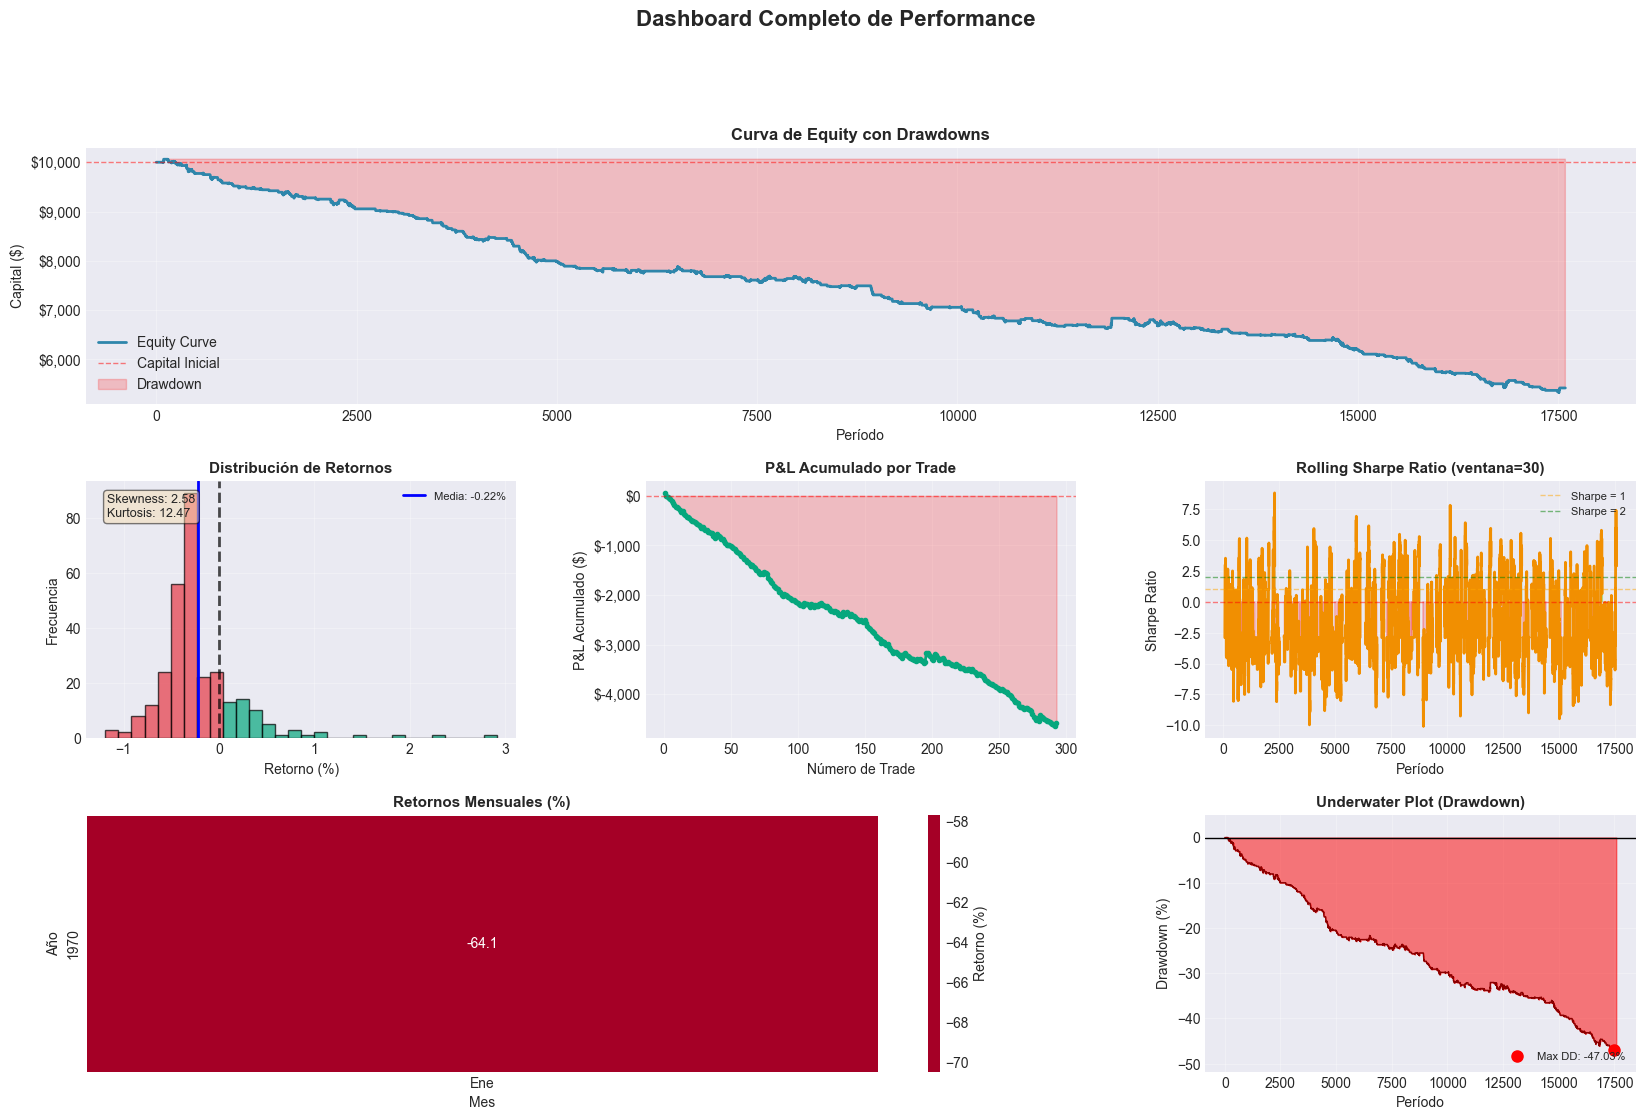

In [7]:
visualizer = PerformanceVisualizerImpl(analyzer)
visualizer.plot_comprehensive_dashboard()

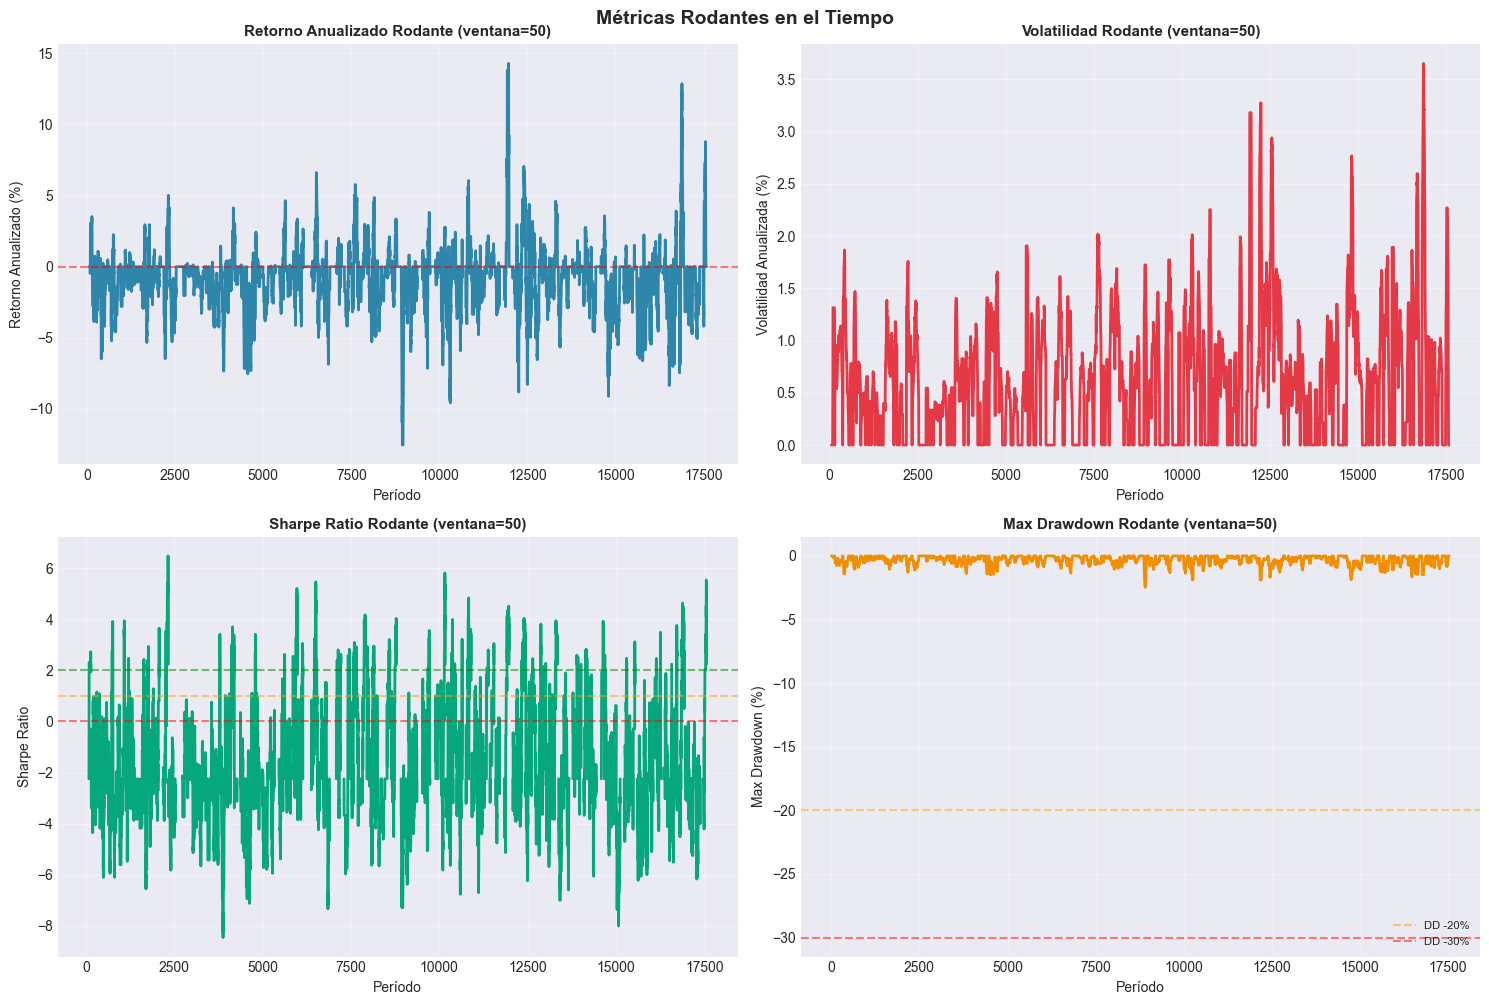

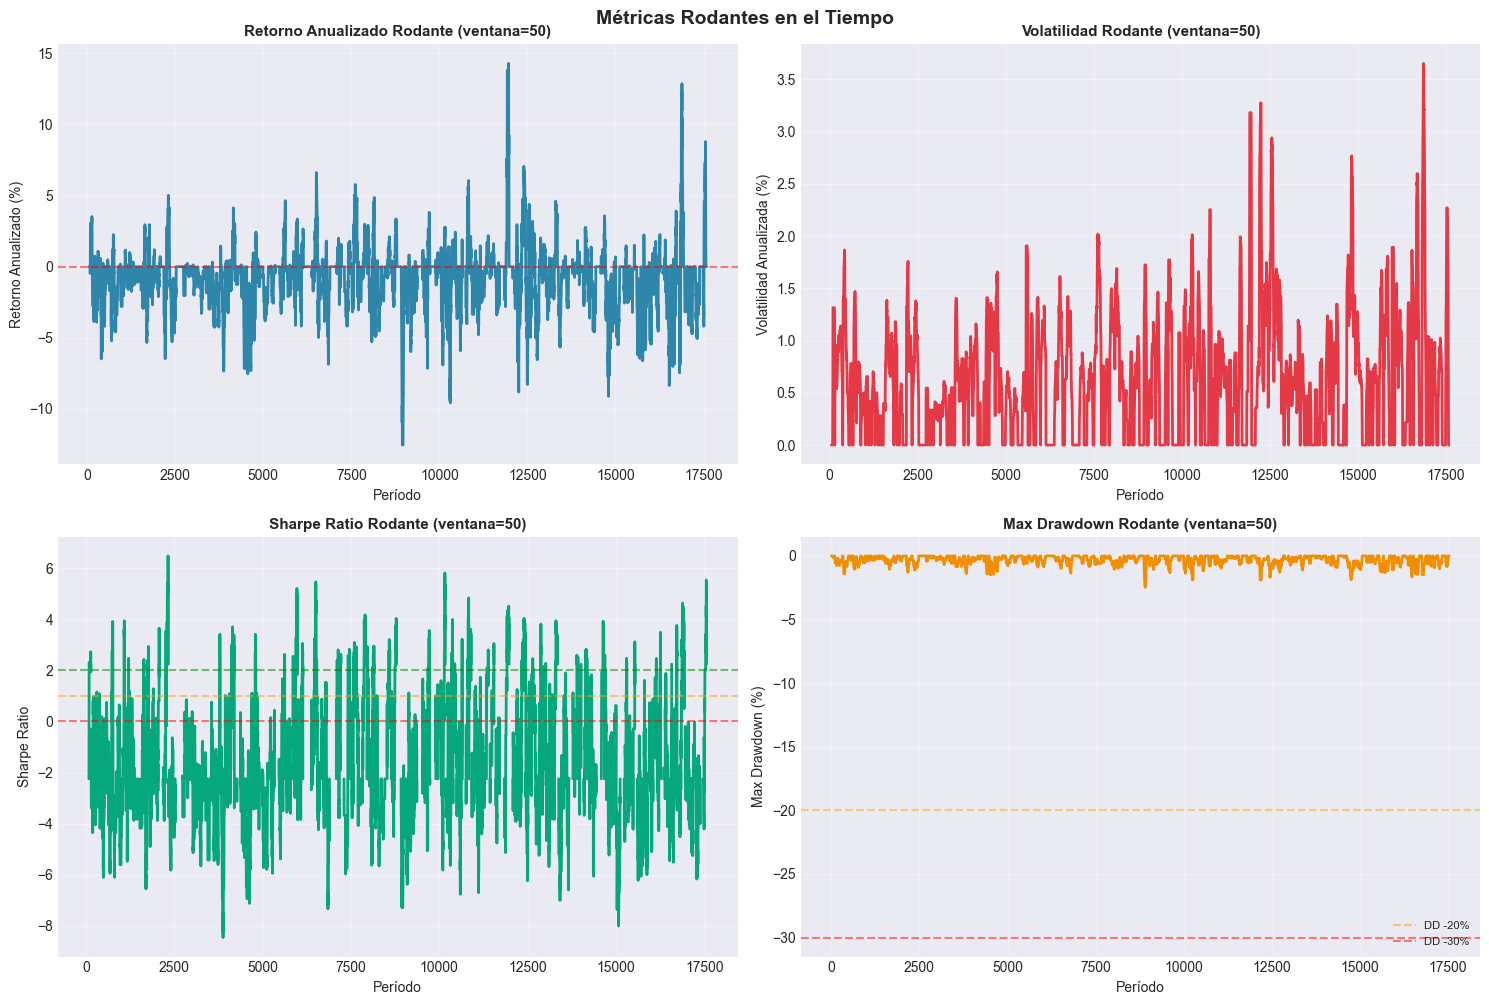

In [8]:
visualizer.plot_rolling_metrics(window=50)

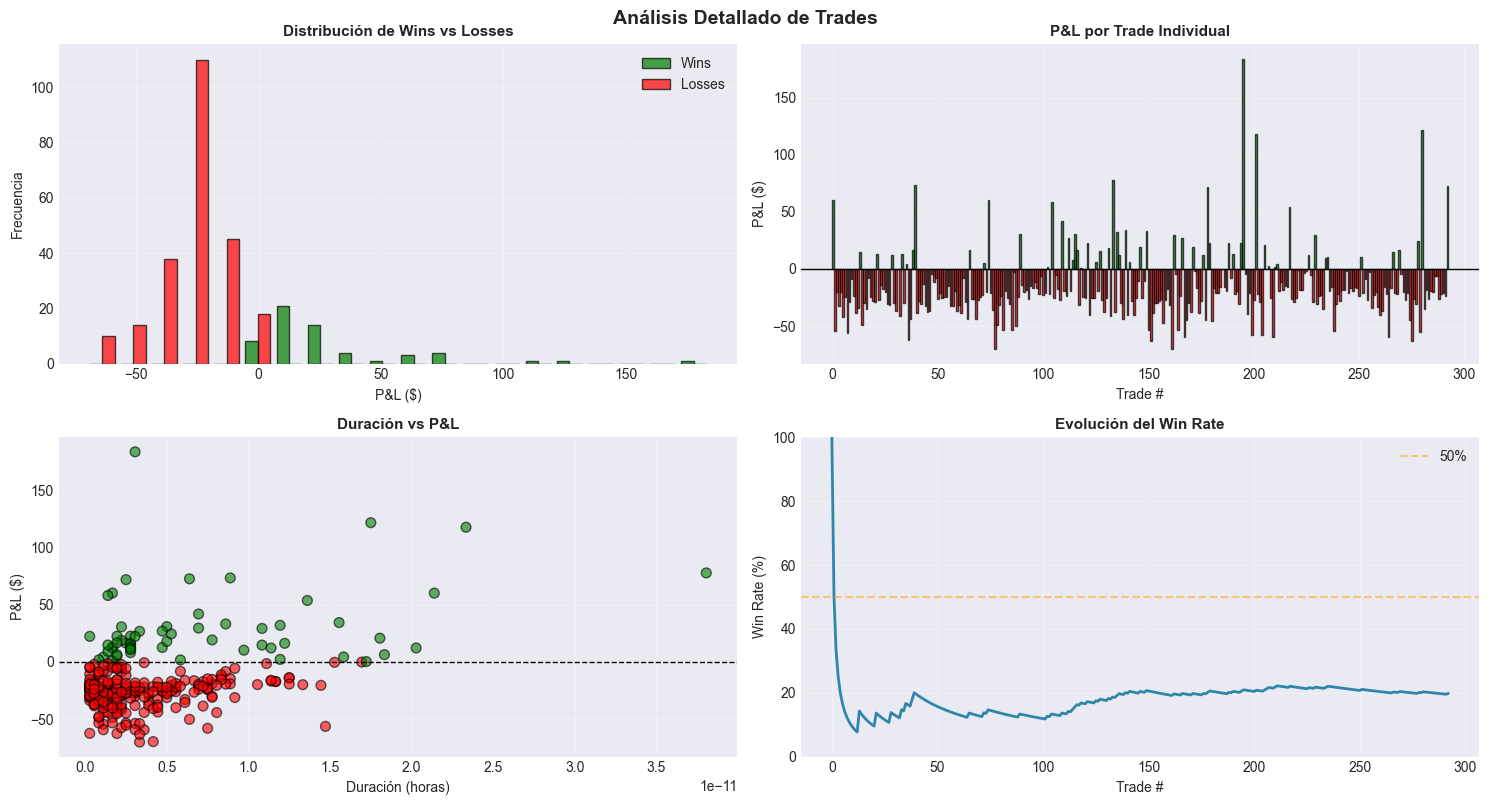

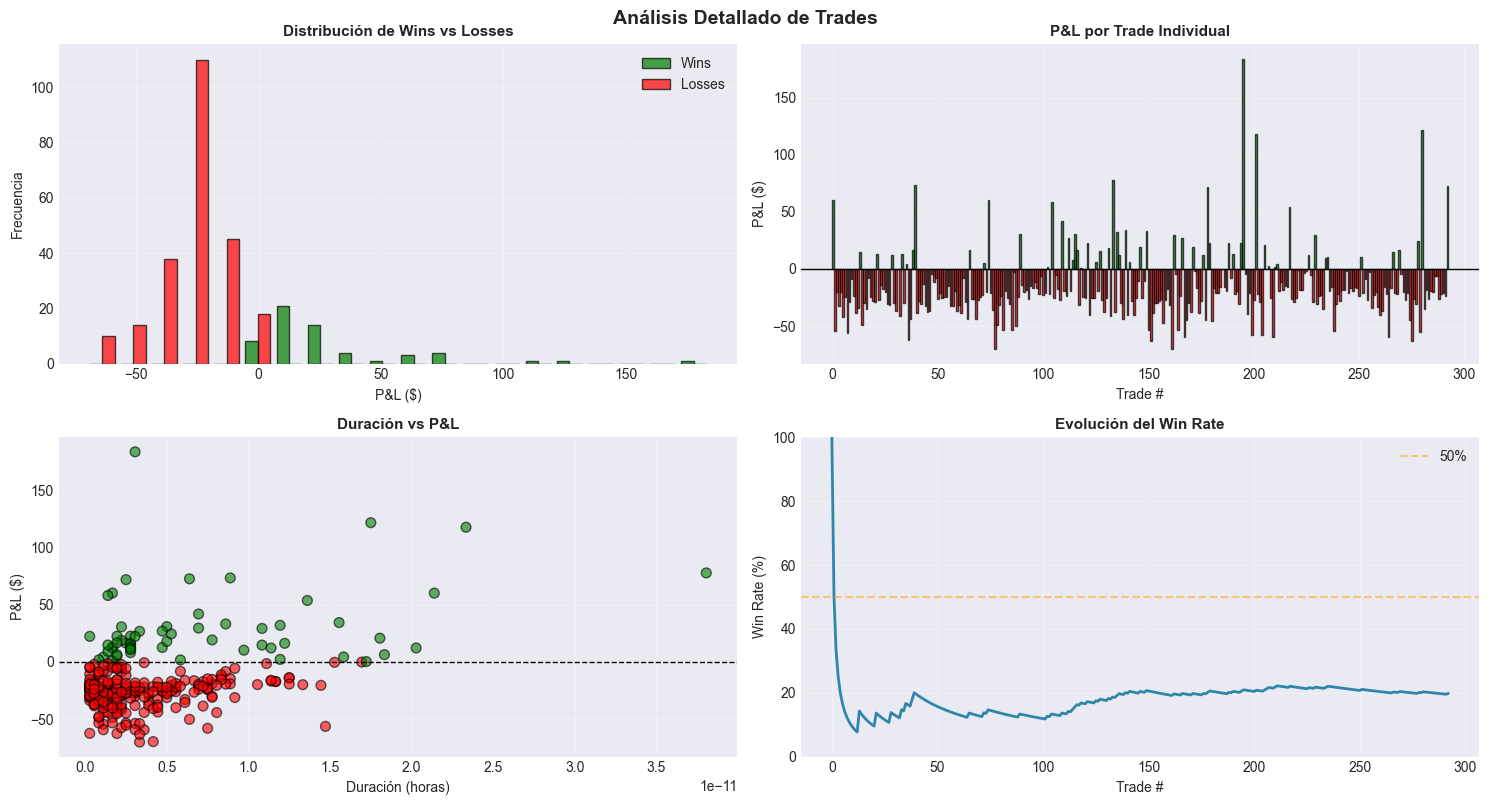

In [9]:
visualizer.plot_trade_analysis()

In [11]:
optimizer = StrategyOptimizer(
    strategy_class=MovingAverageCrossoverStrategy,
    data=data,
    config_template=config,
    objective_metric='sharpe_ratio',
    n_jobs=1
)
optimizer.add_parameter('fast_period', 'int', low=5, high=20, step=5)
optimizer.add_parameter('slow_period', 'int', low=20, high=50, step=10)
optimizer.add_parameter('rsi_period', 'int', low=10, high=20, step=5)

In [12]:
result = optimizer.random_search(n_iter=30, verbose=True)
result.print_summary()


INICIANDO RANDOM SEARCH
Iteraciones: 30

Progreso: 1/30 (3.3%) - Best score: -0.6596
Progreso: 2/30 (6.7%) - Best score: -0.6596
Progreso: 3/30 (10.0%) - Best score: -0.6596
Progreso: 4/30 (13.3%) - Best score: -0.6596
Progreso: 5/30 (16.7%) - Best score: -0.6596
Progreso: 6/30 (20.0%) - Best score: -0.6176
Progreso: 7/30 (23.3%) - Best score: -0.6176
Progreso: 8/30 (26.7%) - Best score: -0.6176
Progreso: 9/30 (30.0%) - Best score: -0.6176
Progreso: 10/30 (33.3%) - Best score: -0.6176
Progreso: 11/30 (36.7%) - Best score: -0.6176
Progreso: 12/30 (40.0%) - Best score: -0.6176
Progreso: 13/30 (43.3%) - Best score: -0.6176
Progreso: 14/30 (46.7%) - Best score: -0.6176
Progreso: 15/30 (50.0%) - Best score: -0.6176
Progreso: 16/30 (53.3%) - Best score: -0.6176
Progreso: 17/30 (56.7%) - Best score: -0.6176
Progreso: 18/30 (60.0%) - Best score: -0.6176
Progreso: 19/30 (63.3%) - Best score: -0.6176
Progreso: 20/30 (66.7%) - Best score: -0.6176
Progreso: 21/30 (70.0%) - Best score: -0.6176
Pro

In [13]:
result2 = optimizer.grid_search()
result2.print_summary()


INICIANDO GRID SEARCH
Total de combinaciones a evaluar: 48
Parametros: ['fast_period', 'slow_period', 'rsi_period']

Progreso: 2/48 (4.2%)
Progreso: 4/48 (8.3%)
Progreso: 6/48 (12.5%)
Progreso: 8/48 (16.7%)
Progreso: 10/48 (20.8%)
Progreso: 12/48 (25.0%)
Progreso: 14/48 (29.2%)
Progreso: 16/48 (33.3%)
Progreso: 18/48 (37.5%)
Progreso: 20/48 (41.7%)
Progreso: 22/48 (45.8%)
Progreso: 24/48 (50.0%)
Progreso: 26/48 (54.2%)
Progreso: 28/48 (58.3%)
Progreso: 30/48 (62.5%)
Progreso: 32/48 (66.7%)
Progreso: 34/48 (70.8%)
Progreso: 36/48 (75.0%)
Progreso: 38/48 (79.2%)
Progreso: 40/48 (83.3%)
Progreso: 42/48 (87.5%)
Progreso: 44/48 (91.7%)
Progreso: 46/48 (95.8%)
Progreso: 48/48 (100.0%)

Método: Grid Search
Mejor Score: -0.4763
Mejores Parámetros: {'fast_period': np.float64(20.0), 'slow_period': np.float64(50.0), 'rsi_period': np.float64(10.0)}
Iteraciones: 48
Tiempo: 56.07s


In [15]:
result2.best_params

{'fast_period': np.float64(20.0),
 'slow_period': np.float64(50.0),
 'rsi_period': np.float64(10.0)}